In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
group_phase_dataset = pd.read_csv("/home/bawbaw31/Documents/datasets/LOL Worlds 2018 Groups stage - Player Ratings.csv")

In [3]:
dividable_columns = ["Kills Total", "Deaths", "Assists", "CS Total", "Minutes Played", "Games Played"]

# cleaning Rikara values => he played 2 times the number of games and that's not possible
def clean_row(i):
    for x in dividable_columns:
        group_phase_dataset.at[48, x] = group_phase_dataset.at[48, x] / 2
        
clean_row(48)

# Error => Jizuke is not a toplaner but a midlaner
group_phase_dataset.at[49, "Position"] = "Mid"

In [4]:
# My team stats
team_stats = group_phase_dataset[(group_phase_dataset["Team"] == "G2")].reset_index().sort_values(by=['Position'])
team_stats[(team_stats['Position'] == 'Mid')]['KDA Ratio']

4    2.7
Name: KDA Ratio, dtype: float64

In [5]:
# Global stats by position
aggregation = {"KDA Ratio" : "mean",
              "Kills Total" : "sum",
              "Deaths" : "sum",
              "Assists" : "sum",
              "Kill Participation" : "mean",
              "CS Per Minute" : "mean",
              "CS Total" : "sum",
              "Minutes Played" : "sum",
              "Games Played" : "sum"}
mean_stats_by_team_by_position = group_phase_dataset.groupby(["Team", "Position"]).agg(aggregation).reset_index()

# Function stats by position for the error bars
def getStatByTeamByPosition(position, stat):
    return mean_stats_by_team_by_position[(mean_stats_by_team_by_position["Position"] == position)].reset_index()[stat]

In [6]:
#adc, supp, top, jung, mid
# Mean stats by positions
mean_stats_by_position = mean_stats_by_team_by_position.groupby(["Position"]).mean().round(1).reset_index().sort_values(by=['Position'])
mean_stats_by_position

,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played
0,ADC,5.3,21.0,11.8,29.7,0.7,9.9,2130.9,214.2,6.5
1,Jungle,4.1,15.6,15.8,34.9,0.7,5.0,1073.1,214.1,6.5
2,Mid,4.0,19.2,14.6,30.6,0.7,9.0,1937.8,214.2,6.5
3,Support,3.7,4.2,16.8,47.1,0.7,1.3,287.5,216.4,6.5
4,Top,3.4,12.8,14.5,29.7,0.6,8.5,1820.2,214.2,6.5


In [8]:
def barGraphByStat(stat):
    barWidth = 0.4
    y1 = mean_stats_by_position[stat]
    y2 = team_stats[stat]
    r1 = range(len(y1))
    r2 = [x + barWidth for x in r1]

    # Bar Graph
    plt.bar(r1, y1, width = barWidth, color = ['yellow' for i in y1], linewidth = 2)
    plt.bar(r2, y2, width = barWidth, color = ['pink' for i in y1], linewidth = 4)
    plt.xticks([r + barWidth / 2 for r in r1], mean_stats_by_position['Position'])
    
    # Error Bar
    error = []
    for position in mean_stats_by_position['Position']:
        stats_by_position = getStatByTeamByPosition(position, stat)
        error.append(stats_by_position.std())
    plt.errorbar(mean_stats_by_position['Position'], y1, yerr=error, fmt="o", color="r")

    # Title & Labels
    plt.title(stat + " Per Position")
    plt.xlabel("Position")
    plt.ylabel(stat)
    
    # Legend
    colors = {'Other teams':'yellow', 'G2':'pink'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

    plt.savefig('graph_' + stat + '.png')
    plt.show()

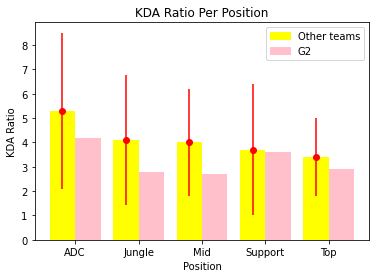

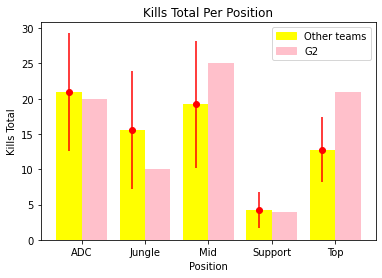

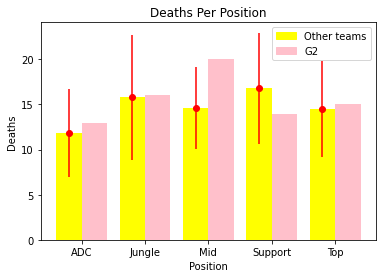

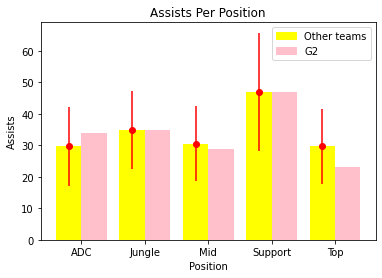

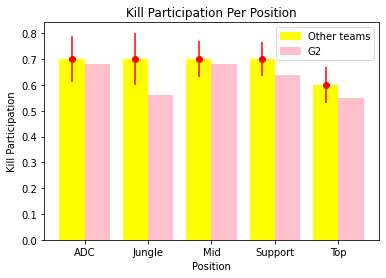

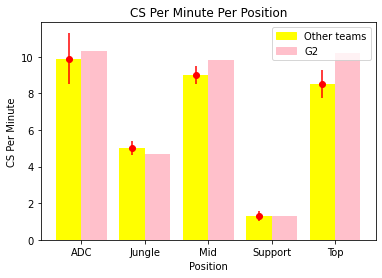

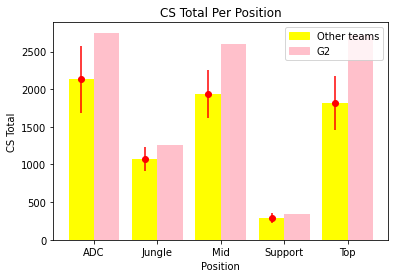

In [9]:
barGraphByStat('KDA Ratio')
# KDA Ratios en dessous de la moyenne en général => surtout mid & jungle

barGraphByStat('Kills Total')
# Kills Total bien au dessus de la moyenne pour le top et le mid qui n'avaient pas un si bon KDA

barGraphByStat('Deaths')
# Bcp trop de morts mid & pas mal jungle

barGraphByStat('Assists')
# Dans l'ensemble dans la moyenne

barGraphByStat('Kill Participation')
# Kill Participation en dessous de l'écart type en jungle & pas très bonne en général

barGraphByStat('CS Per Minute')
# Dans la moyenne dans l'ensemble

barGraphByStat('CS Total')

In [81]:
def barGraphByStatByPosition(position, stat):
    barWidth = 0.4
    y1 = mean_stats_by_position[(mean_stats_by_position['Position'] == position)][stat]
    y2 = team_stats[(team_stats['Position'] == position)][stat]
    r1 = range(len(y1))
    r2 = [x + barWidth for x in r1]

    # Bar Graph
    plt.bar(r1, y1, width = barWidth, color = ['yellow' for i in y1], linewidth = 2)
    plt.bar(r2, y2, width = barWidth, color = ['pink' for i in y1], linewidth = 4)
    plt.xticks([r + barWidth / 2 for r in r1], [position])
    
    # Error Bar
    error = []
    stats_by_position = getStatByTeamByPosition(position, stat)
    error.append(stats_by_position.std())
    plt.errorbar([position], y1, yerr=error, fmt="o", color="r")

    # Title & Labels
    plt.title(stat + ' in ' + position + ' position : Mean vs Team')
    plt.xlabel('Position')
    plt.ylabel(stat)
    
    # Legend
    colors = {'Other teams':'yellow', 'G2':'pink'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

    plt.savefig('graph_' + stat + '_' + position + '.png')
    plt.show()

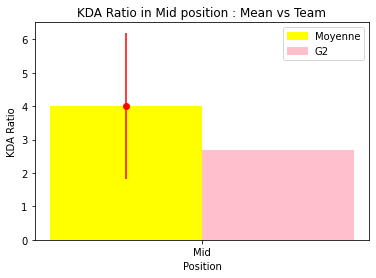

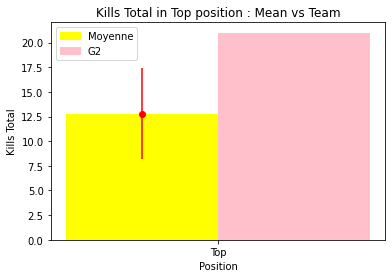

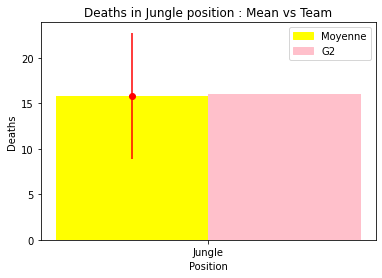

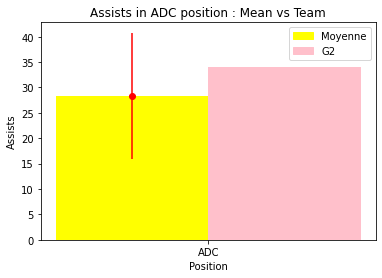

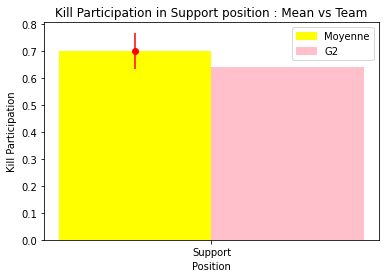

In [82]:
barGraphByStatByPosition('Mid', 'KDA Ratio')
barGraphByStatByPosition('Top', 'Kills Total')
barGraphByStatByPosition('Jungle', 'Deaths')
barGraphByStatByPosition('ADC', 'Assists')
barGraphByStatByPosition('Support', 'Kill Participation')